Implementation of Sentiment analysis from customer feedback

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('/content/Test.csv')
text = df['text'].values
label = df['label'].values

In [ ]:
train_text, test_text, train_label, test_label = train_test_split(text, label, test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_text)
train_sequences = tokenizer.texts_to_sequences(train_text)
test_sequences = tokenizer.texts_to_sequences(test_text)

In [ ]:
maxlen=200
train_padded = pad_sequences(train_sequences, maxlen=maxlen, truncating='post', padding='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen, truncating='post', padding='post')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=maxlen),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train_padded, train_label, epochs=20, validation_data=(test_padded, test_label))

125/125 [==============================] - 1s 11ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6425 - val_accuracy: 0.8210
Epoch 15/20
125/125 [==============================] - 1s 11ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.6566 - val_accuracy: 0.8220
Epoch 16/20
125/125 [==============================] - 1s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.6685 - val_accuracy: 0.8230
Epoch 17/20
125/125 [==============================] - 1s 8ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.6837 - val_accuracy: 0.8210
Epoch 18/20
125/125 [==============================] - 1s 8ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.6958 - val_accuracy: 0.8270
Epoch 19/20
125/125 [==============================] - 1s 7ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.7231 - val_accuracy: 0.8240
Epoch 20/20
125/125 [==============================] - 1s 8ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.7434 - val_accuracy: 0.8210


In [ ]:
predictions = model.predict(test_padded)

32/32 [==============================] - 0s 9ms/step


In [ ]:
predictions = (predictions > 0.5).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, predictions)
print(cm)

[[424  79]
 [100 397]]


Text(50.722222222222214, 0.5, 'Actual')

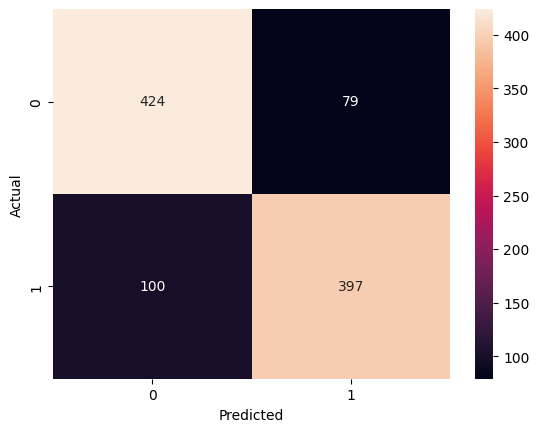

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_label, predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       503
           1       0.83      0.80      0.82       497

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

